In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager


In [5]:
ChromeDriverManager().install()

'/Users/martinreyes/.wdm/drivers/chromedriver/mac64/116.0.5845.140/chromedriver-mac-x64/chromedriver'

In [3]:
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

url = 'https://www.glassdoor.com/Reviews/AT-and-T-Texas-Reviews-EI_IE613.0,8_IL.9,14_IS1347.htm'

# Set up the Selenium driver with options
options = Options()
options.add_argument('--headless')  # Run in headless mode
driver = webdriver.Chrome(service=Service(webdriver_path), options=options)

# Load the webpage
driver.get(url)


In [8]:
# Install Webdriver
service = Service(ChromeDriverManager().install())
# Create Driver Instance
driver = webdriver.Chrome(service=service)

In [45]:
driver.quit()

In [4]:
# Install Webdriver
service = Service(ChromeDriverManager().install())

In [127]:
# Create Driver Instance
driver = webdriver.Chrome(service=service)

driver.get("""https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm""")

pros = ''
for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
    pros += pro.text
print(len(pros))
cons = ''
for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
    cons += con.text

driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
next_url = driver.current_url

driver.quit()

# Create Driver Instance
driver = webdriver.Chrome(service=service)
driver.get(next_url)

for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
    pros += pro.text

for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
    cons += con.text
print(len(pros2))
print(len(pros))

9769
3204
12973


In [46]:
pros = ''
cons = ''

for i in range(5):
    print(i)
    if i == 0:
        next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

    driver = webdriver.Chrome(service=service)
    driver.get(next_url)
    for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
        pros += pro.text

    for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
        cons += con.text
    
    driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
    next_url = driver.current_url
    driver.quit()

0
1
2
16136


In [47]:
len(cons)

19200

In [235]:
# Install Webdriver
service = Service(ChromeDriverManager().install())

names = []
ratings = []
pros = []
cons = []

# company page 1-30
for page in range(1, 2):
    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    driver = webdriver.Chrome(service=service)
    # access company page
    driver.get(url)

    # Find employer name tags
    employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
    # Find employer rating tags
    employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
    # Find employer review link tags
    review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')

    for link in review_links:
        link.click
        # Get company pros and cons
        pros = ''
        cons = ''

        for i in range(5):
            print(i)
            if i == 0:
                next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

            driver = webdriver.Chrome(service=service)
            driver.get(next_url)
            for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
                pros += pro.text

            for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
                cons += con.text

            driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
            next_url = driver.current_url

            driver.quit()
    
    # Extract names and ratings and add them to the lists
    for name, rating in zip(employer_names, employer_ratings):
        names.append(name.text)
        ratings.append(rating.text)

    # Create a DataFrame
    data = {'employer_name': names,
            'rating': ratings}
    df = pd.DataFrame(data)

df        


KeyboardInterrupt



In [70]:
hrefs = []
for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
    hrefs.append(ele.get_attribute("href"))


In [71]:
hrefs

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm',
 'https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm',
 'https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm',
 'https://www.glassdoor.com/Reviews/Target-Reviews-E194.htm',
 'https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm',
 'https://www.glassdoor.com/Reviews/Infosys-Reviews-E7927.htm',
 'https://www.glassdoor.com/Reviews/Accenture-Reviews-E4138.htm',
 'https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm',
 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651.htm',
 'https://www.glassdoor.com/Reviews/Tata-Consultancy-Services-Reviews-E13461.htm']

In [85]:
driver.quit()

In [244]:
names = []
ratings = []
review_urls = []

for page in range(1, 101):
    print(page)
    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    # access company page
    driver = webdriver.Chrome(service=service)
    driver.get(url)

    # Find employer name tags
    employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
    # Find employer rating tags
    employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
    # Find employer review link tags
    review_links = driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]')
     
    # Extract names and ratings and add them to the lists
    for name, rating, link in zip(employer_names, employer_ratings, review_links):
        names.append(name.text)
        ratings.append(rating.text)
        review_urls.append(link.get_attribute("href"))
    
    driver.quit()
    
    # Create a DataFrame
    data = {'name': names,
            'rating': ratings,
            'url': review_urls}
    
df = pd.DataFrame(data)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


WebDriverException: Message: disconnected: Unable to receive message from renderer
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=116.0.5845.140)
Stacktrace:
0   chromedriver                        0x000000010ba0f638 chromedriver + 5002808
1   chromedriver                        0x000000010ba06a53 chromedriver + 4966995
2   chromedriver                        0x000000010b5b7a57 chromedriver + 449111
3   chromedriver                        0x000000010b59c320 chromedriver + 336672
4   chromedriver                        0x000000010b59c0b1 chromedriver + 336049
5   chromedriver                        0x000000010b59b58d chromedriver + 333197
6   chromedriver                        0x000000010b5c3944 chromedriver + 497988
7   chromedriver                        0x000000010b63f3fc chromedriver + 1004540
8   chromedriver                        0x000000010b6241c3 chromedriver + 893379
9   chromedriver                        0x000000010b5efdf9 chromedriver + 679417
10  chromedriver                        0x000000010b5f0fde chromedriver + 683998
11  chromedriver                        0x000000010b9cc2d9 chromedriver + 4727513
12  chromedriver                        0x000000010b9d12de chromedriver + 4747998
13  chromedriver                        0x000000010b98f2c9 chromedriver + 4477641
14  chromedriver                        0x000000010b9d202d chromedriver + 4751405
15  chromedriver                        0x000000010b9a50ec chromedriver + 4567276
16  chromedriver                        0x000000010b9ef7f8 chromedriver + 4872184
17  chromedriver                        0x000000010b9ef9b7 chromedriver + 4872631
18  chromedriver                        0x000000010b9ffa1f chromedriver + 4938271
19  libsystem_pthread.dylib             0x00007ff816da21d3 _pthread_start + 125
20  libsystem_pthread.dylib             0x00007ff816d9dbd3 thread_start + 15


In [256]:
pd.Series([])

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm',
 'https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm',
 'https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm',
 'https://www.glassdoor.com/Reviews/Target-Reviews-E194.htm',
 'https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm',
 'https://www.glassdoor.com/Reviews/Infosys-Reviews-E7927.htm',
 'https://www.glassdoor.com/Reviews/Accenture-Reviews-E4138.htm',
 'https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm',
 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651.htm',
 'https://www.glassdoor.com/Reviews/Tata-Consultancy-Services-Reviews-E13461.htm',
 'https://www.glassdoor.com/Reviews/Starbucks-Reviews-E2202.htm',
 'https://www.glassdoor.com/Reviews/Google-Reviews-E9079.htm',
 'https://www.glassdoor.com/Reviews/Cognizant-Technology-Solutions-Reviews-E8014.htm',
 'https://www.glassdoor.com/Reviews/EY-Reviews-E2784.htm',
 'https://www.glassdoor.com/Reviews/The-Home-Depot-Reviews-E655.htm'

In [257]:
data = {'name': names, 'rating': ratings, 'url': review_urls
       }
df = pd.DataFrame(data)

In [259]:
df

,name,rating,url
0,Amazon,3.7,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,Deloitte,4.0,https://www.glassdoor.com/Reviews/Deloitte-Rev...
2,Walmart,3.3,https://www.glassdoor.com/Reviews/Walmart-Revi...
3,Target,3.6,https://www.glassdoor.com/Reviews/Target-Revie...
4,McDonald's,3.5,https://www.glassdoor.com/Reviews/McDonald-s-R...
...,...,...,...
985,Duke Health,3.7,https://www.glassdoor.com/Reviews/Duke-Health-...
986,Walmart Global Tech,3.9,https://www.glassdoor.com/Reviews/Walmart-Glob...
987,Five Below,3.3,https://www.glassdoor.com/Reviews/Five-Below-R...
988,UniFirst,3.7,https://www.glassdoor.com/Reviews/UniFirst-Rev...


In [260]:
df.to_csv('../ratings.csv')

In [252]:
len(df)

20

In [254]:
len(names)

990

In [255]:
len(ratings)

990

In [ ]:
for url in review_urls:
    pros = ''
    cons = ''
    for i in range(20):
        print(i)
        if i == 0:
            next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

        driver = webdriver.Chrome(service=service)
        driver.get(next_url)
        for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
            pros += pro.text

        for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
            cons += con.text

        driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
        next_url = driver.current_url
        driver.quit()

In [ ]:
# Initialize an empty list to store data
data = []

# Loop through the review URLs
for company_url in review_urls[242:300]:
    print(company_url)
    max_retries = 3
    retry_count = 0
    while retry_count < max_retries:
        try:
            pros = ''
            cons = ''

            for i in range(10):
                if i % 4 == 0:
                    print(i)
                if i == 0:
                    next_url = company_url

                driver = webdriver.Chrome(service=service)
                driver.get(next_url)

                for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']"):
                    pros += pro.text + '\n'

                for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']"):
                    cons += con.text + '\n'

                driver.find_element(By.CSS_SELECTOR, 'button[data-test="pagination-next"]').click()
                next_url = driver.current_url

                driver.quit()

            data.append({'company': company_url, 'pros': pros, 'cons': cons})
            break  # Break the while loop if successful
        except Exception as e:
            print(f"An error occurred: {e}")
            retry_count += 1
            print(f"Retrying... Attempt {retry_count}")
            time.sleep(5)  # Wait for a few seconds before retrying

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

https://www.glassdoor.com/Reviews/Randstad-US-Reviews-E18424.htm
0
4
8
https://www.glassdoor.com/Reviews/The-Cigna-Group-Reviews-E119.htm
0
4
8
https://www.glassdoor.com/Reviews/Nielsen-Reviews-E3776.htm
0
4
8
https://www.glassdoor.com/Reviews/Adecco-Reviews-E1089.htm
0
4
8
An error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-test="pagination-next"]"}
  (Session info: chrome=116.0.5845.140); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010324b638 chromedriver + 5002808
1   chromedriver                        0x0000000103242a53 chromedriver + 4966995
2   chromedriver                        0x0000000102df3a57 chromedriver + 449111
3   chromedriver                        0x0000000102e39d05 chromedriver + 736517
4   chromedriver                        0x0000000102e39

0
4
8
https://www.glassdoor.com/Reviews/Lumen-Reviews-E248324.htm
0
4
8
https://www.glassdoor.com/Reviews/UST-Reviews-E155577.htm
0
4
8
https://www.glassdoor.com/Reviews/Manpower-Reviews-E2548.htm
0
4
8
https://www.glassdoor.com/Reviews/Securitas-Reviews-E10656.htm
0
4
An error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-test="pagination-next"]"}
  (Session info: chrome=116.0.5845.140); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x00000001087ab638 chromedriver + 5002808
1   chromedriver                        0x00000001087a2a53 chromedriver + 4966995
2   chromedriver                        0x0000000108353a57 chromedriver + 449111
3   chromedriver                        0x0000000108399d05 chromedriver + 736517
4   chromedriver                        0x0000000108399ec1 c

0
4
An error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-test="pagination-next"]"}
  (Session info: chrome=116.0.5845.140); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x00000001089e8638 chromedriver + 5002808
1   chromedriver                        0x00000001089dfa53 chromedriver + 4966995
2   chromedriver                        0x0000000108590a57 chromedriver + 449111
3   chromedriver                        0x00000001085d6d05 chromedriver + 736517
4   chromedriver                        0x00000001085d6ec1 chromedriver + 736961
5   chromedriver                        0x000000010861af04 chromedriver + 1015556
6   chromedriver                        0x00000001085fd41d chromedriver + 893981
7   chromedriver                        0x0000000108618391 chromedriver + 1004433


In [267]:
data

[{'company': 'https://www.glassdoor.com/Reviews/Freelancer-Reviews-E392261.htm',
  'pros': "great, perfect, how do I stop\nWorking for myself is great.\nProject variety. The ability to learn and grow in an ever changing field is what I love most!\nUnbiased to drive the best solution, with end-to-end satisfaction at a competitive price\nYou can make your own hours and choose the work that you like\nWorking from home, time freedom\nFlexibility: Freelancers have the freedom to set their own work hours and choose when and where they work. This flexibility allows for a better work-life balance and can accommodate personal commitments. Independence: Freelancers are their own bosses, which means they have more control over the projects they take on and the clients they work with. This autonomy can lead to greater job satisfaction. Diverse Income Streams: Freelancers can work with multiple clients simultaneously, diversifying their income streams and reducing the risk of relying solely on one 

In [289]:
df8 = pd.DataFrame(data)

In [304]:
df8

,company,pros,cons
0,https://www.glassdoor.com/Reviews/PayPal-Revie...,Can’t describe how great it was to work for Pa...,I honestly can’t think of any negatives.\nExtr...
1,https://www.glassdoor.com/Reviews/Gap-Reviews-...,Great work environment and the culture was gre...,"No cons, everything about this job was great.\..."
2,https://www.glassdoor.com/Reviews/NTT-DATA-Rev...,It's a really great company and respect your a...,No Cons as of now I seen.\noff shoring oversea...
3,https://www.glassdoor.com/Reviews/The-Coca-Col...,"Consumer understanding, Building Global Brands...","Work-Life balance , Pay rate, Agility, Innovat..."
4,https://www.glassdoor.com/Reviews/DaVita-Revie...,"Great culture, engaging with growth and develo...","Competitive pay, communication and clarity.\nD..."
...,...,...,...
61,https://www.glassdoor.com/Reviews/Visa-Inc-Rev...,Good benefits and great pay\nBenefits were bes...,There was No work life balance\n24/7 customer ...
62,https://www.glassdoor.com/Reviews/lululemon-Re...,"Amazing work environment, pay, benefits\nHad a...",Could be better growth potential\nThere is alw...
63,https://www.glassdoor.com/Reviews/Genpact-Revi...,"good 401k match, health insurance\nEasy work, ...",not many clients i guess\nHorrible management ...
64,https://www.glassdoor.com/Reviews/Merck-Review...,Great company to work for.\nSome good people. ...,No negative reviews at this time.\nWork/Life B...


In [292]:
len(df8)

66

In [297]:
#df

In [300]:
df8.to_csv('176_241.csv')

In [ ]:
review_urls[75]

In [113]:
len(review_urls)

990

In [111]:
df['url'] = pd.Series(review_urls)

In [115]:
df[:991]

,employer_name,rating,rating_binned,url
0,Amazon,3.7,3,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,Deloitte,4.0,4,https://www.glassdoor.com/Reviews/Deloitte-Rev...
2,Walmart,3.3,3,https://www.glassdoor.com/Reviews/Walmart-Revi...
3,Target,3.6,3,https://www.glassdoor.com/Reviews/Target-Revie...
4,McDonald's,3.5,3,https://www.glassdoor.com/Reviews/McDonald-s-R...
...,...,...,...,...
986,GlobalLogic,3.9,3,https://www.glassdoor.com/Reviews/Tiffany-and-...
987,Lam Research,4.0,4,https://www.glassdoor.com/Reviews/Chuck-E-Chee...
988,Kaplan,3.6,3,https://www.glassdoor.com/Reviews/PTC-Reviews-...
989,Allscripts,3.9,3,https://www.glassdoor.com/Reviews/Colgate-Palm...


In [100]:
df['rating'] = df['rating'].astype(float)

<Axes: xlabel='rating', ylabel='Count'>

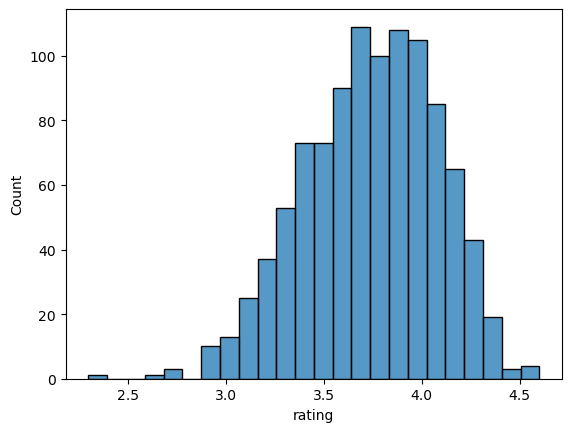

In [101]:
import seaborn as sns
sns.histplot(df['rating'])

In [102]:
# Define the bin edges
bin_edges = [0, 3.3, 3.7, 4.2, 5.0]

# Define the bin labels
bin_labels = [3, 3.5, 4, 4.5]

# Add a new column 'rating_binned' to the DataFrame with the binned values
df['rating_binned'] = pd.cut(df['rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['rating_binned'].value_counts()

In [104]:
# Define the bin edges
bin_edges = [0, 3.9, 5.0]

# Define the bin labels
bin_labels = [3, 4]

# Add a new column 'rating_binned' to the DataFrame with the binned values
df['rating_binned'] = pd.cut(df['rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['rating_binned'].value_counts()

3    696
4    324
Name: rating_binned, dtype: int64

In [108]:
driver.quit()

In [10]:
driver.find_elements(By.XPATH, 'a[@data-test="ceil-Reviews-url"]')

[]

In [9]:
driver.find_elements(By.XPATH, './/span[@class="css-u9lko5 euttuq60"]')[]

[<selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_165")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_166")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_167")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_168")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_169")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_170")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72fee

In [ ]:
driver.find_elements(By.XPATH, './/span[@class="css-u9lko5 euttuq60"

In [ ]:
for ele in driver.find_elements(By.XPATH, './/span[@class="css-u9lko5 euttuq60":
                                

In [72]:
driver.quit()

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
driver = webdriver.Chrome(service=service)
# List of company URLs
company_urls = [
    "https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm",
    "https://www.glassdoor.com/Reviews/Google-Reviews-E9079.htm",
    # Add more company URLs here
]
# Create a list to store data
data = []

names = []
ratings = []

# Initialize webdriver service
# Loop through company URLs
for company_url in company_urls:
    next_url = company_url
    company_data = {'Company': names,
                    'Ratings': ratings,
                    'Pros': '',
                    'Cons': ''}
    for i in range(1):
        driver = webdriver.Chrome(service=service)
        driver.get(next_url)
        ratings = [rating.text for rating
                   in driver.find_elements(By.XPATH, "//span[@data-test='rating']")]
        # Extract pros and cons
        pros = [pro.text for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']")]
        cons = [con.text for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']")]
        # Add to company_data
        company_data['Pros'] += ' '.join(pros)
        company_data['Cons'] += ' '.join(cons)
        try:
            # Try to click the pagination next button
            pagination_next = driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]')
            pagination_next.click()
            next_url = driver.current_url
        except:
            # If there's no next page, break the loop
            break
        driver.quit()
    data.append(company_data)
# Create a DataFrame from the collected data
df = pd.DataFrame(data)

In [6]:
df

,Company,Pros,Cons
0,https://www.glassdoor.com/Reviews/Amazon-Revie...,Gain useful experience and great benefits Real...,Not much room for advancement You have to be s...
1,https://www.glassdoor.com/Reviews/Google-Revie...,"Awesome Food, great talented coworkers, People...",i can not find any yet. Career opportunities a...


In [80]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page=1&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
# access company page
driver = webdriver.Chrome(service=service)
driver.get(url)

review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')

# Find employer name tags
employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
# Find employer rating tags
employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
names = []
ratings = []

# Extract names and ratings and add them to the lists
for name, rating in zip(employer_names, employer_ratings):
    names.append(name.text)
    ratings.append(rating.text)
    
review_urls = []
for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
    review_urls.append(ele.get_attribute("href"))

# Create a list to store data
data = []
# Initialize webdriver service
# Loop through company URLs
for i, review_url in enumerate(review_urls):
    company_data = {'url': review_url,
                    'name': names[i],
                    'rating': ratings[i],
                    'pros': '',
                    'cons': ''}
    for i in range(1):
        driver = webdriver.Chrome(service=service)
        driver.get(review_url)
        # Extract pros and cons
        pros = [pro.text for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']")]
        cons = [con.text for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']")]
        # Add to company_data
        company_data['pros'] += ' '.join(pros)
        company_data['cons'] += ' '.join(cons)
        try:
            # Try to click the pagination next button
            pagination_next = driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]')
            pagination_next.click()
            next_url = driver.current_url
        except:
            # If there's no next page, break the loop
            break
        driver.quit()
    data.append(company_data)
# Create a DataFrame from the collected data
df = pd.DataFrame(data)

In [82]:
df.to_csv('../sample_raw_data.csv')

In [79]:
driver.quit()

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.webdriver.common.by import By


data = []

for page_number in range(1, 3):

    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page_number}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    # access company page
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service = service)
    driver.get(url)
    review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')
    # Find employer name tags
    # Find employer rating tags
    

    review_urls = []
    for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
        review_urls.append(ele.get_attribute("href"))
    # Create a list to store data
    
    # Initialize webdriver service
    # Loop through company URLs
    for i, review_url in enumerate(review_urls):
        company_data = {'url': review_url,
                        'pros': '',
                        'cons': ''}
        for i in range(1):
            driver = webdriver.Chrome(service=service)
            driver.get(review_url)
            # Extract pros and cons
            pros = [pro.text for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']")]
            cons = [con.text for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']")]
            # Add to company_data
            company_data['pros'] += ' '.join(pros)
            company_data['cons'] += ' '.join(cons)
            try:
                # Try to click the pagination next button
                pagination_next = driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]')
                pagination_next.click()
                next_url = driver.current_url
            except:
                # If there's no next page, break the loop
                print('error')
                break
            driver.quit()
        data.append(company_data)
# Create a DataFrame from the collected data
df = pd.DataFrame(data)
csv_filename = 'part1.csv'  # Change this to your desired filename
df.to_csv(csv_filename, index=False)